# Лабораторная работа 3. Линейные методы.

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков IPython (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете также должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

Мы уверены, что выполнение лабораторных работ занимает значительное время, поэтому не рекомендуем оставлять их на последний вечер перед сдачей.

### Оценивание и штрафы
* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* Максимально допустимая оценка за работу — 15 баллов
* Сдавать задание после указанного срока сдачи нельзя
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса)
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировкам
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

Обратите внимание, что мы не ставим оценку за просто написанный код, корректная работоспособность которого не подтверждена экспериментами.

### Правила сдачи
Выполненную работу следует отправить в систему Anytask. Более подробно о системе можно почитать на странице курса. Название отправляемого файла должно иметь следующий формат: Surname_Name_Group_NN.ipynb, где NN — номер лабораторной работы. Например, Kozlova_Anna_CS_03.ipynb.

<a id='log_reg'></a>
## Логистическая регрессия

В этом пункте мы будем рассматривать бинарную классификацию, где метки классов лежат во множестве $\{-1, 1\}$. 

Задачу обучения регуляризованной логистической регрессии можно записать следующим образом:

$$ \dfrac{1}{N}\sum_{i=1}^N \log(1 + \exp(-\langle w, x_i \rangle y_i)) + \dfrac{C}{2}\lVert w \rVert^2  \to \min_w$$

Обучение в данном случае сводится к нахождению параметров модели $w$, которое производится с помощью метода градиентного спуска (Gradient Descent, GD). 

Градиентный шаг будет заключаться в обновлении вектора весов по следующей формуле:

$$w := w + \dfrac{\eta}{N}\sum_{i=1}^N y_ix_i \Big(1 - \dfrac{1}{1 + exp(-\langle w, x_i \rangle y_i)}\Big) - \eta Cw$$

где $\eta > 0$ — размер шага (learning rate).

В общем случае метод градиентного спуска имеет следующие недостатки:
- попадание в локальные минимумы
- неочевидность критерия останова
- выбор размера шага
- начальная инициализация весов

В этой части лабораторной работы мы предложим вам реализовать метод градиентного спуска, а также рассмотрим некоторые его модификации.



In [1]:
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
#from LogisticRegression import *
from sklearn.linear_model import SGDClassifier
from numpy.random import rand
from sklearn.metrics import accuracy_score

### Задание

Сгенерируйте выборку из 1000 точек с 20 признаками на которой будете проводить эксперименты. Мы рекомендуем воспользоваться функцией [make_classification](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification) из пакета sklearn. Обратите внимание, что метки классов для данной задачи должны быть из множества {-1, 1} (по умолчанию make_classification возвращает метки из множества {0, 1}).

In [229]:
X, y = make_classification(n_samples=1000, n_features=20, n_redundant=0, n_informative=2, n_clusters_per_class=1)

scaler = MinMaxScaler(feature_range=(-1,1))
X = scaler.fit_transform(X)
#y = scaler.fit_transform(y)
pd.DataFrame(X).describe()
y = (y - 0.5)*2
#pd.DataFrame(X)

**(3 балла)** Реализуйте градиентный спуск и протестируйте его для случая логистической регрессии на ранее сгенерированной выборке. Для сравнения качества разных подходов используйте значение оптимизируемого функционала.

В качестве критерия останова мы предлагаем использовать следующие условия:
 - евклидова норма разности текущего и нового векторов весов стала меньше, чем 1e-4
 - ограничение на число итераций (например, 10000)
 
Для начальной инициализации весов нужно сравнить следующие подходы:
 - нулевая начальная инициализация
 - случайная
 
Выполните следующие пункты и прокомментируйте полученные результаты:
- Рассмотрите как влияет размер шага на сходимость (попробуйте не менее 5-ти различных значений).
- Рассмотрите регуляризованную модель (не менее 5-ти различных коэффициентов регуляризации), которая описана выше, а также модель без регуляризатора. Сравните влияет ли наличие регуляризации на скорость сходимости и качество (под качеством во всех случаях подразумевается значение исходного, нерегуляризованного функционала).
- Исследуйте качество оптимизируемого функционала в зависимости от номера итерации (при правильной реализации и подходящем размере шага он должен убывать).
- Влияет ли выбор начальной инициализации весов на скорость и качество?

В каждом пункте требуется построить необходимые графики скорости/качества и дать исчерпывающие выводы.

In [16]:
small_x = np.array([[2, 0], [0, 2], [2, 4]])
small_w = np.array([2, -1])
#small_w = small_w.reshape(-1,1)
labels = np.array([[1], [-1], [1]])

print("x", small_x.shape)
print("w", small_w.shape)
print("y", labels.shape)

x (3, 2)
w (2,)
y (3, 1)


In [219]:
def score(w, x):
    w = np.squeeze(np.asarray(w))
    x = np.squeeze(np.asarray(x))
    return np.dot(w, x)

def margin(w, x, y):
    return score(w, x) * y

def prediction(w, x):
    #print(score(w, x))
    if score(w, x) > 0:
        return -1
    if score(w, x) <= 0:
        return 1

def LogisticLoss(w, x, y):
    return np.log(1.0 + 1.0/np.exp(-1.0 * margin(w, x, y)))

def dLogisticLoss(w, x, y):
    frac = 1.0/(1.0 + np.exp(-margin(w, x, y)))
    return y * x * (1.0 - frac)

def TrainLoss(w, x, y):
    loss = 0
    for i in range(x.shape[0]):
        loss = np.sum(LogisticLoss(w, x[i], y[i]))
    return 1.0/x.shape[0] * loss

def dTrainLoss(w, x, y):
    grad = 0
    for i in range(x.shape[0]):
        grad += dLogisticLoss(w, x[i], y[i])
    return grad / (x.shape[0] * 1.0)

        
print("margin", margin(small_w, small_x[0], labels[0]))

print("prediction", prediction(small_w, small_x[0]))
print("Loss", LogisticLoss(small_w, small_x[0], labels[0]))
print("dL", dLogisticLoss(small_w, small_x[0], labels[0]))

print("trainLoss", TrainLoss(small_w, small_x, labels))
print("dtrainLoss", dTrainLoss(small_w, small_x, labels))

margin [4]
prediction -1
Loss [4.01814993]
dL [0.03597242 0.        ]
trainLoss 0.23104906018664842
dtrainLoss [0.34532414 0.58719805]


In [246]:
def xavier(in_):
    return np.random.randn(in_) * np.sqrt(2. / (in_))

class LinearClassifier:
    def __init__(self, X, y, random_init=True):
        self.X = add_bias(X)
        self.y = y.reshape(-1,1)
        self.M = self.X.shape[0]
        self.N = self.X.shape[1]
        if random_init == True:
            self.w = xavier(self.N)
        else:
            self.w = np.zeros(self.N)
  
        
    def fit(self, epochs=1000, lr=0.001):
    
        cost_val = []
        for i in range(epochs):
            j = TrainLoss(self.w, self.X, self.y)
            cost_val.append(j)
            
            df = dTrainLoss(self.w, self.X, self.y)
            self.w -= lr * df

        return cost_val
    
    def predict(self, X1, y1):
        X1 = add_bias(X1)
        y1 = y1.astype("int")
        pred_arr = []
        for item in X1:
            pred = prediction(self.w, item)
            pred_arr.append(pred) 
        pred_arr = np.array(pred_arr)
        #print(y1)
        #print("\n", pred_arr)
        acc = accuracy_score(y, pred_arr)
        return acc

    
lc = LinearClassifier(X, y, random_init=True)
loss_vals = lc.fit(epochs=1000);

In [247]:
lc.predict(X, y)

0.63

0.0006292568183877031


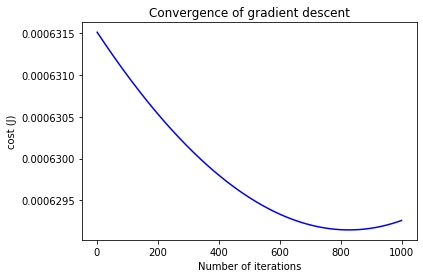

In [248]:
print(loss_vals[-1])
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")
plt.plot(range(1, len(loss_vals) +1), loss_vals, color ='blue')


In [36]:
def add_bias(X):
    X = pd.DataFrame(X)
    X = pd.concat([pd.Series(1, index=X.index, name='00'), X], axis=1)
    X = np.array(X)
    return X


def xavier(in_, out_):
    return np.random.randn(in_, out_) * np.sqrt(2. / (in_ + out_))


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# cross entropy
def cost_function(X, y, weights):                 
    z = np.dot(X, weights)        
    predict_1 = y * np.log(sigmoid(z))
    predict_0 = (1 - y) * np.log(1 - sigmoid(z))        
    return -sum(predict_1 + predict_0) / len(X)


class LogRegression:
    def __init__(self, X, y, random_init=False):
        self.X = add_bias(X)
        self.y = y.reshape(-1,1)
        self.M = self.X.shape[0]
        self.N = self.X.shape[1]
        if random_init == False:
            self.w = xavier(self.N, 1)
        else:
            self.w = np.zeros((self.N, 1))
  
        
    def fit(self, epochs=10000, lr=0.1, eps = 0.0001):
        cost_val = []
        curr =  np.random.rand(self.N, 1)
        
        for i in range(epochs):
            j = cost_function(self.X, self.y, self.w)  
            cost_val.append(j)
            
            curr = self.w.copy()      # make soft copy
            
            #print(curr)
            y_hat = sigmoid(np.dot(self.X, self.w))
            self.w -= lr * np.dot(self.X.T,  (y_hat - self.y)) / (self.M)
            
            diff_v = self.w - curr
            
            print("\n",  diff_v)
            #print("\n", self.w)
            print("dist", np.sum(np.abs(diff_v)))
            
            
            #print("dist", np.linalg.norm(diff_v, ord=1))
            #print(np.linalg.norm(diff_v))
#             if np.linalg.norm(np.abs(diff_v)) < eps:
#             #if diff_v < eps:
#                 print("reached min", np.linalg.norm(diff_v))
#                 break
            
    
        return cost_val
    
    def predict(self, X, y):
        X = add_bias(X)
        y = y.reshape(-1,1)
        pred = np.around(sigmoid(X @ self.w))
        acc = accuracy_score(y, pred)
        return acc

In [9]:
def return_accuracy(nn, epochs, lr):
    cost_val = nn.fit(epochs=epochs, lr=lr)
    acc_train = nn.predict(nn.X, nn.y)
    return acc_train, cost_val

In [17]:
def profile(nn, k, ep=1000, rate=0.01):
    acc, cost_val = return_accuracy(nn, epochs=ep, lr=rate)
    
    plt.subplot(1, 3, k)
    plt.subplots_adjust(right = 4)
    plt.xlabel("Number of iterations")
    plt.ylabel("cost (J)")
    plt.title("Convergence of gradient descent")
    plt.plot(range(1, len(cost_val) +1), cost_val, color ='blue')
    #plt.figure(figsize=(20,20))
    return cost_val[-1]


## Find best Paramaters using CV:

In [177]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True)
skf.get_n_splits(X, y)

#cv_params = pd.DataFrame(columns=["acc", "lr", "epochs"])
cv_params = np.array([])
for i in range(5):
    epochs = np.geomspace(1000, 1e5, num=5, dtype="int")
    lr = np.geomspace(0.1, 1e-5, num=5)
    mean_acc = np.array([])
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        log_reg = LogRegression(X_train, y_train)
        log_reg.fit(epochs=epochs[i], lr=lr[i])
        pred = log_reg.predict(X_test, y_test)
        mean_acc = np.append(mean_acc, pred)
    cv_params = np.append(cv_params, [mean_acc.mean(), lr[i], epochs[i]])
cv_params = cv_params.reshape((-1, 3))
pd.DataFrame(cv_params, columns=["acc", "lr", "epochs"])


,acc,lr,epochs
0,0.912,0.10000,1000.0
1,0.883,0.01000,3162.0
2,0.797,0.00100,10000.0
3,0.691,0.00010,31622.0
4,0.568,0.00001,100000.0


## Speed Test for GD

In [187]:
"""
    Влияет ли выбор начальной инициализации весов на скорость и качество
       
       => yes, zero initlization predicts worse and works slower
"""

nn = LogRegression(X, y, False)
acc, vals = return_accuracy(nn, 1000, 0.1)
print("accuracy with xavier:", acc)

nn = LogRegression(X, y, True)
acc, vals = return_accuracy(nn, 1000, 0.1)
print("accuracy with zeros:", acc)

%timeit LogRegression(X, y, False)

%timeit LogRegression(X, y, True)

accuracy with xavier: 0.967
accuracy with zeros: 0.966
718 µs ± 1.04 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
712 µs ± 2.41 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## GD - Convergence with regard to LR:

min value: 0.20852562978520112 with lr: 0.1
min value: 0.5479551025551774 with lr: 0.010000000000000002
min value: 0.6382671861290845 with lr: 0.0010000000000000002


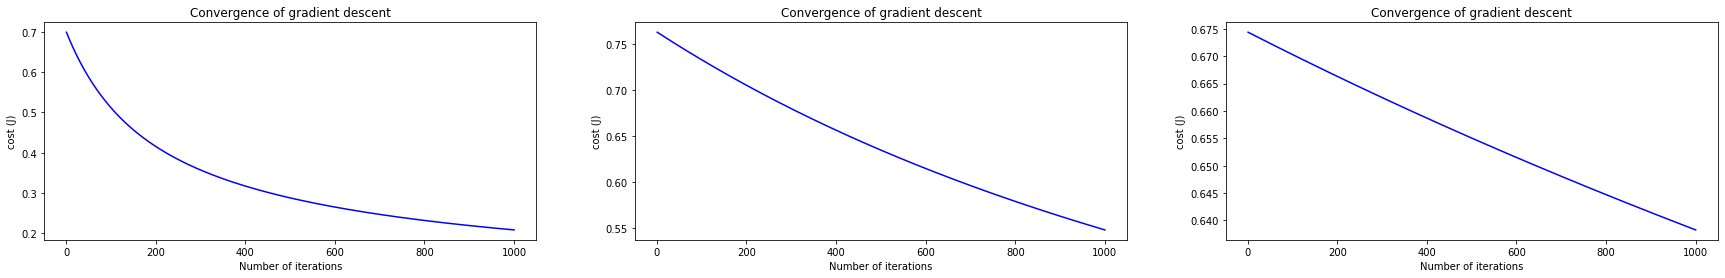

In [188]:
# change leraning rate + change epochs linearly

"""
    Рассмотрите как влияет размер шага на сходимость
    fixed epochs @ 1000
    
        ==> with higehr learning rate we obtain bigger loss
            ==> Why???
"""

lr = 1
for i in range(1,4):
    lr = lr * 0.1 
    nn = LogRegression(X, y, False)
    cost = profile(nn, i, rate=lr)
    print("min value: {} with lr: {}".format(cost[-1],lr ))

## GD - Convergence with regard to Epochs:

min value: 0.7314786793984946 with num epochs: 100
min value: 0.5197446919511739 with num epochs: 1000
min value: 0.19988054299562094 with num epochs: 10000


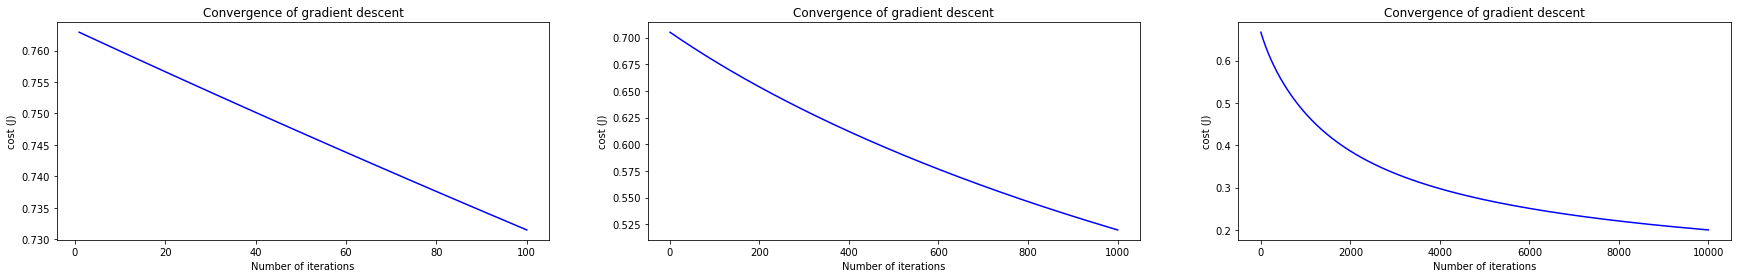

In [189]:
"""
    Исследуйте качество оптимизируемого функционала в зависимости от номера итерации 
    fixed learning rate @ 0.01
    
        ==> with more epochs our cost is decreasing
"""


epochs = 10
for i in range(1,4):
    epochs = epochs * 10
    nn = LogRegression(X, y, False)
    cost = profile(nn, i, ep=epochs)
    print("min value: {} with num epochs: {}".format(cost[-1], epochs))

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому обычно используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит сразу по этому объекту. 

**(1.5 балл)** Реализуйте метод стохастического градиентного спуска (sgd). В этом случае вы можете выбрать наиболее удачный функционал, исходя из предыдущего пункта (с регуляризацией, без), а также схему начальной инициализации весов. Реализуйте метод в виде класса, удовлетворяющего интерфейсу scikit-learn ([тут есть пример](http://danielhnyk.cz/creating-your-own-estimator-scikit-learn/)).

Сравните рассмотренные методы (градиентный спуск и sgd) между собой с точки зрения скорости сходимости и качества.

- Посмотрите как влияет размер шага на сходимость (попробуйте 4-5 различных значений)
- Исследуйте качество оптимизируемого функционала в зависимости от номера итерации

Выберите лучший размер шага и сравните качество и скорость сходимости реализованного метода и [его аналога из scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) (не забудьте выставить значения важных параметров tol и learning_rate для сравнения методов в приближённо равных условиях). Насколько получилось лучше/хуже, в чём могут быть причины?

В каждом пункте сделайте исчерпывающие выводы, подкреплённые графиками.

In [190]:
class SGD_logReg:
    def __init__(self, X, y, random_init=False):
        self.X = add_bias(X)
        self.y = y.reshape(-1,1)
        self.M = self.X.shape[0]
        self.N = self.X.shape[1]
        if random_init == False:
            self.w = xavier(self.N, 1)
        else:
            self.w = np.zeros((self.N, 1))
  
        
    def fit(self, epochs=100, lr=0.1, batch_size=10):
        cost_val = []
        
        for i in range(epochs):
            
            random_indices = np.random.choice(self.M, size=batch_size, replace=False) # random sample
            y_batch = np.take(self.y, random_indices)
            y_batch = y_batch.reshape(-1,1)
            X_batch = self.X [random_indices, :]
            
            j = cost_function(X_batch, y_batch, self.w)  
            cost_val.append(j)
            
            y_hat = sigmoid(np.dot(X_batch, self.w))
            self.w -= lr * np.dot(X_batch.T,  (y_hat - y_batch)) / (batch_size)
                  
        return cost_val
    
    def predict(self, X1, y1):
        pred = np.around(sigmoid(X1 @ self.w))
        acc = accuracy_score(y1, pred)
        return acc

## SGD vs GD

In [191]:
"""
    Сравните рассмотренные методы (градиентный спуск и sgd) между собой с точки 
    зрения скорости сходимости и качества.
            
        ==> SGD predicts worse but converges faster
                         
"""


sgd = SGD_logReg(X, y, False)
acc, cost_arr = return_accuracy(sgd, 1000, 0.01)
print("SGD accuracy:", acc)

nn = LogRegression(X, y, False)
acc, vals = return_accuracy(nn, 1000, 00.1)
print("GD accuracy:", acc)


%timeit SGD_logReg(X, y, False)

%timeit LogRegression(X, y, False)


SGD accuracy: 0.887
GD accuracy: 0.965
726 µs ± 4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
732 µs ± 11.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## SGD - Convergence with regard to LR:

min value: 0.1281987108207342 with lr: 0.1
min value: 0.6005161017678866 with lr: 0.010000000000000002
min value: 0.7912145864792459 with lr: 0.0010000000000000002


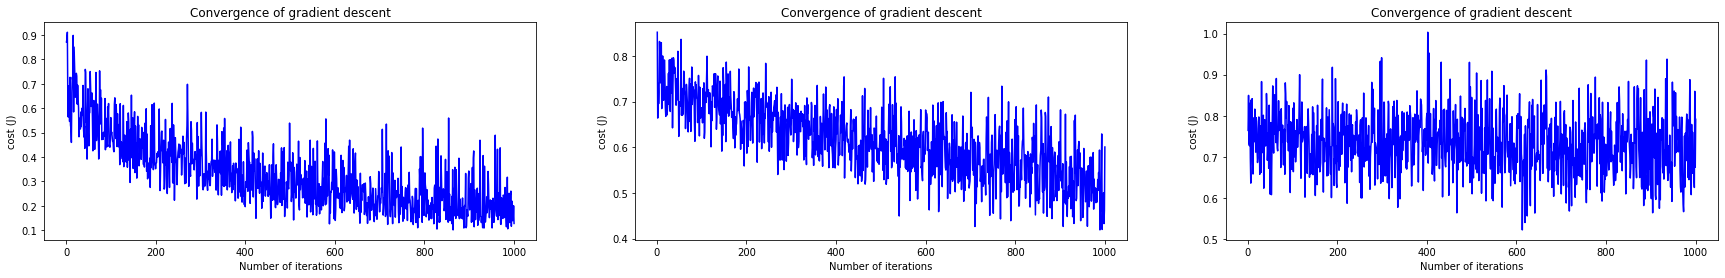

In [194]:
"""
    Посмотрите как влияет размер шага на сходимость
    fixed epochs @ 1000
    
        => higer learning rate gives bigger loss
"""

lr = 1
for i in range(1,4):
    lr = lr * 0.1 
    nn = SGD_logReg(X, y, False)
    cost = profile(nn, i, rate=lr)
    print("min value: {} with lr: {}".format(cost[-1],lr ))

## SGD-Convergence with regard to Epochs:

min value: 0.7355659211545078 with num epochs: 100
min value: 0.39034447247083515 with num epochs: 1000
min value: 0.14755488471801104 with num epochs: 10000


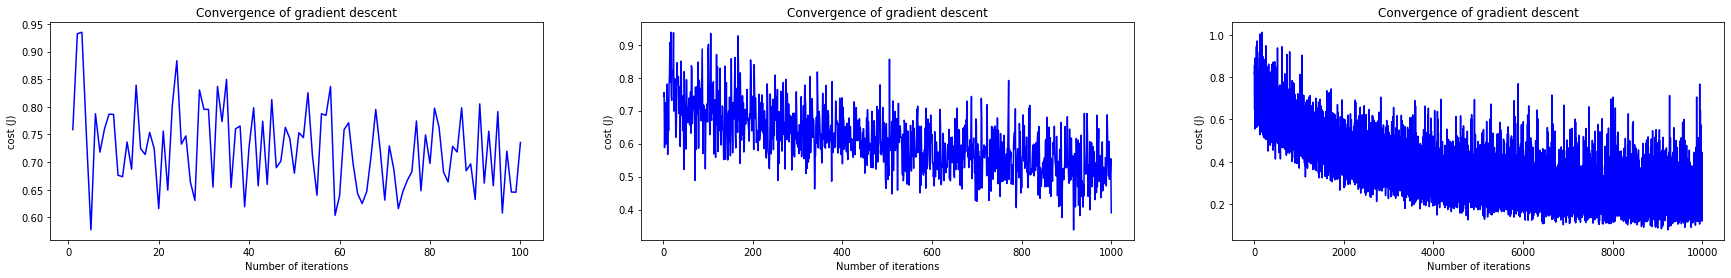

In [195]:
"""
    Исследуйте качество оптимизируемого функционала в зависимости от номера итерации
    fixed learning rate @ 0.01
    
            => more itterations give better loss
"""

epochs = 10
for i in range(1,4):
    epochs = epochs * 10
    nn = SGD_logReg(X, y, False)
    cost = profile(nn, i, ep=epochs)
    print("min value: {} with num epochs: {}".format(cost[-1], epochs))

## Sklearn Linear Model Implementation

In [198]:
"""
    Выберите лучший размер шага и сравните качество и скорость сходимости реализованного метода 
    и его аналога из scikit-learn
    
        ==> scikit-learn predicts better
    
"""

clf = SGDClassifier(max_iter=1000, tol=1e-4)
clf.fit(X, y)
pred = clf.predict(X)
print("scikit-learn accuracy:", accuracy_score(pred, y))

scikit-learn accuracy: 0.985


**(0.5 балла)** Добавьте в выборку случайный шум следующим способом:
 1. Выберите случайно 3% объектов из сгенерированной ранее выборки.
 2. Сдвиньте эти объекты на $\mathcal{N}(0; 3 * scale)$, где $scale$ —  масштаб, который был использован при генерации объектов (параметр $scale$ в make_classification).
 3. Инвертируйте классы выбранных объектов.
 
Для GD и SGD сравните скорость сходимости и значение функции потерь до и после добавления шума. Сделайте необходимые выводы, подкреплённые графиками.

In [199]:
# :(

Между обновлением вектора весов по всей выборке и на одном объекте есть промежуточный подход — выбирать некоторое случайное подмножество объектов и обновлять веса по нему. Такой подход называется mini-batch. Мы не будем реализовывать этот подход в данной работе, однако иногда его бывает осмысленно использовать на практике. 

Один из недостатков sgd состоит в том, что он может не доходить до локального оптимального решения, а осциллировать в окрестности. 

![](http://sebastianruder.com/content/images/2015/12/without_momentum.gif)

Для решения этой проблемы существуют методы, позволяющие устранить этот недостаток, а также ускорить сходимость. Рассмотрим некоторые из них.

![](http://nghenglim.github.io/images/2015061300.png)

### Momentum

Этот метод позволяет направить sgd в нужной размерности и уменьшить осцилляцию. 

В общем случае он будет выглядеть следующим образом: 

$$ v_t = \gamma v_{t - 1} + \eta \nabla_{\theta}{J(\theta)}$$
$$ \theta = \theta - v_t$$

где

 - $\theta$ — вектор параметров (в нашем случае — $w$)
 - $J$ — оптимизируемый функционал
 - $\gamma$ — momentum term (обычно выбирается 0.9)
 
### Adagrad 

Одной из сложностей является выбор размера шага (*learning rate*). Основное отличие данного метода от SGD состоит в том что размер шага определяется для каждого параметра индивидуально. Этот метод хорошо работает с разреженным данным большого объема. 

Обозначим градиент по параметру $\theta_i$ на итерации $t$ как $g_{t,i} = \nabla_{\theta}J(\theta_i)$. 

В случае sgd обновление параметра $\theta_i$ будет выглядеть следующим образом:

$$ \theta_{t+1, i} = \theta_{t, i} - \eta \cdot g_{t,i}$$

А в случае Adagrad общий шаг $\eta$ нормируется на посчитанные ранее градиенты для данного параметра:

$$ \theta_{t+1, i} = \theta_{t, i} - \dfrac{\eta}{\sqrt{G_{t,ii} + \varepsilon}} \cdot g_{t,i}$$

где $G_t$ — диагональная матрица, где каждый диагональный элемент $i,i$ — сумма квадратов градиентов для $\theta_{i}$ до $t$-ой итерации. $\varepsilon$ — гиперпараметр, позволяющий избежать деления на 0 (обычно выбирается около *1e-8*).

Так как матрица $G_t$ диагональна, в векторном виде это будет выглядеть следующим образом (здесь $\odot$ — матричное умножение):

$$ \theta_{t+1} = \theta_{t} - \dfrac{\eta}{\sqrt{G_t + \varepsilon}} \odot g_t $$

### Adadelta

Adadelta, в отличии от Adagrad, рассматривает не все предыдущие значения градиентов, а только последние $k$. Кроме того, сумма градиентов определяется как уменьшающееся среднеее всех предыдущих квадратов градиентов. Текущее среднее $E[g^2]_t$ на итерации $t$ будет вглядеть следующим образом:

$$ E[g^2]_t = \gamma E[g^2]_{t-1} + (1-\gamma)g_t^2 $$

здесь $\gamma$ аналогична гиперпараметру из метода Momentum.

Тогда обновление весов можно записать следующим образом:

$$ \theta_{t+1} = \theta_{t} - \dfrac{\eta}{\sqrt{E[g^2]_t + \varepsilon}} g_t $$ 

Перепишем это немного по-другому:

$$ \theta_{t+1} = \theta_{t} + \Delta \theta_t$$ 
$$\Delta \theta_t = - \dfrac{\eta}{\sqrt{E[g^2]_t + \varepsilon}} g_t $$ 

Аналогично среднему для градиентов определим среднее для параметров $\theta$:

$$ E[\Delta \theta^2]_t = \gamma E[\Delta \theta^2]_{t-1} + (1-\gamma)\Delta \theta^2 $$

Введем обозначение $RMS[p]_t = \sqrt{E[p]_t + \varepsilon}$

Тогда Adadelta выглядит следующим образом:

$$\Delta \theta_t = - \dfrac{RMS[\Delta \theta^2]}{RMS[ga^2]} g_t $$ 
$$ \theta_{t+1} = \theta_{t} + \Delta \theta_t$$ 


Более подробно об этих и других способах оптимизации можно прочитать:
 - [здесь](http://sebastianruder.com/optimizing-gradient-descent/index.html#gradientdescentoptimizationalgorithms) очень хорошее описание различных способов оптимизации, в этом задании мы опираемся на терминологию из данной статьи
 - статья про [momentum](https://pdfs.semanticscholar.org/97da/c94ffd7a7ac09a4218848300cc7e98569d77.pdf)
 - оригинальная статья про [adagrad](http://www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf)
 - оригинальная статья про [adadelta](http://arxiv.org/pdf/1212.5701v1.pdf)
 - википедия про [momentum](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Momentum) и [adagrad](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#AdaGrad)
 - [визуализация](http://imgur.com/a/Hqolp) разных способов оптимизации

### Задание

Реализуйте метод оптимизации *Momentum* **(0.5 балла)** и один из *Adagrad*/*Adadelta* **(1 балл)**.
- Сравните оба метода с классическим sgd с точки зрения скорости сходимости.
- Посмотрите как значение гиперпараметра $\gamma$ влияет на скорость сходимости и качество в методе *Momentum*.

В заданиях выше требуется построить графики и описать полученные результаты.

Дало ли преимущество использование адаптивного шага в методе *Adagrad*/*Adadelta*?

In [200]:
def graphs(cost_val, k):
    plt.subplot(1, 3, k)
    plt.subplots_adjust(right = 4)
    plt.xlabel("Number of iterations")
    plt.ylabel("cost (J)")
    plt.title("Convergence of gradient descent")
    plt.plot(range(1, len(cost_val) +1), cost_val, color ='blue')
    #plt.figure(figsize=(20,20))

In [17]:
class Momentum_SGD_logReg:
    def __init__(self, X, y, random_init=False):
        self.X = add_bias(X)
        self.y = y.reshape(-1,1)
        self.M = self.X.shape[0]
        self.N = self.X.shape[1]
        if random_init == False:
            self.w = xavier(self.N, 1)
        else:
            self.w = np.zeros((self.N, 1))
  
        
    def fit(self, epochs=100, lr=0.1, batch_size=10, opt="momentum", mu=0.9):
        cost_val = []
        
        cache=np.zeros(self.N).reshape(-1,1)
        for i in range(epochs):
            
            random_indices = np.random.choice(self.M, size=batch_size, replace=True) # random sample
            y_batch = np.take(self.y, random_indices)
            y_batch = y_batch.reshape(-1,1)
            X_batch = self.X [random_indices, :]
            
            j = cost_function(X_batch, y_batch, self.w)  
            cost_val.append(j)
            
            y_hat = sigmoid(np.dot(X_batch, self.w))
            dx = np.dot(X_batch.T,  (y_hat - y_batch)) / (batch_size)
           
            v = 0
            if opt == "momentum":
                v = mu * v + lr * dx
                self.w = self.w - v 
            
            
            if opt =="adagrad":
                cache += dx**2
                self.w = self.w - lr * dx / (np.sqrt(cache + 1e-4))
            else:
                self.w -=lr * dx
                
                  
        return cost_val
    
    def predict(self, X, y):
        X = add_bias(X)
        y = y.reshape(-1,1)
        pred = np.around(sigmoid(X @ self.w))
        acc = accuracy_score(y, pred)
        return acc

In [21]:
adgrad_lg = Momentum_SGD_logReg(X, y)
adgrad_lg.fit(opt="adagrad");
print(adgrad_lg.predict(X, y))

mom_lg = Momentum_SGD_logReg(X, y)
mom_lg.fit();
mom_lg.predict(X, y)

0.834


0.868

##  Momentum SGD vs classic SGD

In [205]:
"""
    Сравните оба метода с классическим sgd с точки зрения скорости сходимости
    
        ==> Momentum SGD much stronger but slower than SGD
"""


mom_sgd = Momentum_SGD_logReg(X, y, False)
vals = mom_sgd.fit(epochs=1000, mu=0.8, opt="momentum")
acc = mom_sgd.predict(X, y)
print("Mometum SGD accuracy:", acc)

sgd = SGD_logReg(X, y, False)
acc, cost_arr = return_accuracy(sgd, 1000, 0.01)
print("SGD accuracy:", acc)

%timeit Momentum_SGD_logReg(X, y, False)

%timeit SGD_logReg(X, y, False)


Mometum SGD accuracy: 0.981
SGD accuracy: 0.818
734 µs ± 3.42 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
736 µs ± 415 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [123]:
mom_sgd = Momentum_SGD_logReg(X, y, False)

vals = mom_sgd.fit(epochs=1000, opt="adagrad")

/home/iris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/home/iris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in multiply


## Mometum SGD-Convergence with regard to Epochs:

min value: [0.49936496] with num epochs: 100
min value: [0.30653163] with num epochs: 1000
min value: [0.16826903] with num epochs: 10000


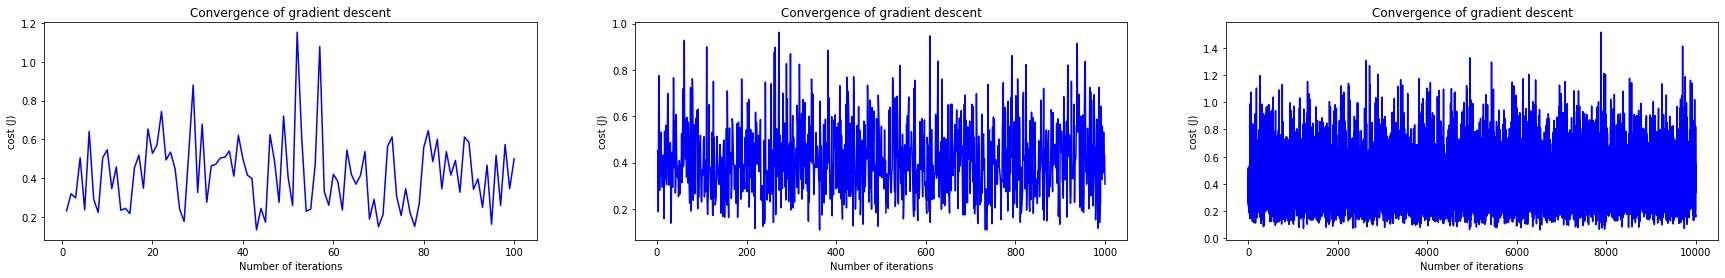

In [18]:
"""
    has the smallest loss
    faster convergence
"""

epochs = 10
for i in range(1,4):
    epochs = epochs * 10
    
    nn = Momentum_SGD_logReg(X, y, False)
    vals = mom_sgd.fit(epochs=epochs, mu=0.9, opt="momentum")
    acc = mom_sgd.predict(X, y)
    graphs(vals, i)
    print("min value: {} with num epochs: {}".format(vals[-1], epochs))

## Mometum SGD-Convergence with regard to Mu:

min value: [0.35358719] with mu: 0.5
min value: [0.71636276] with mu: 0.7150000000000001
min value: [0.58136152] with mu: 0.93


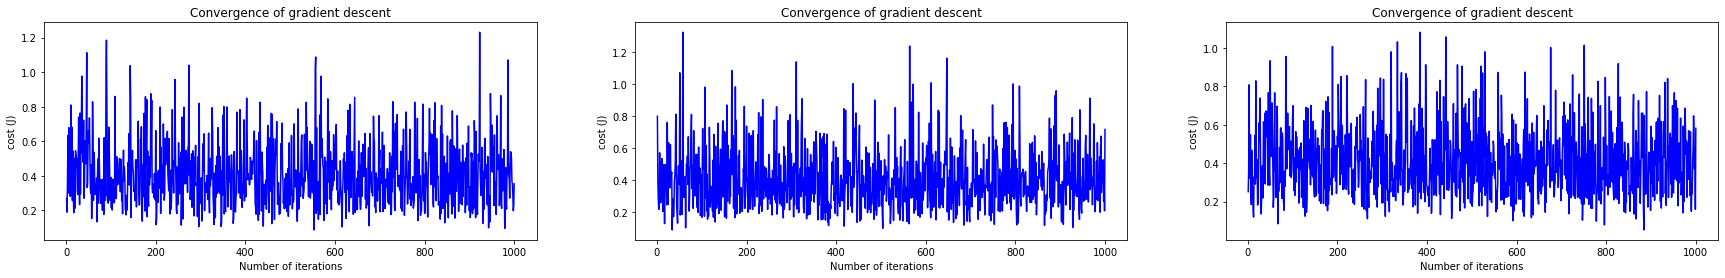

In [19]:
"""
    Посмотрите как значение гиперпараметра  𝛾
    влияет на скорость сходимости и качество в методе Momentum
    
            => it effects but unclear in what way
"""

mu = np.linspace(0.5, 0.93, num=3)

for i in range(1, 4):
    ind = mu[i-1]
    nn = Momentum_SGD_logReg(X, y, False)
    vals = mom_sgd.fit(epochs=1000, lr=0.01 , mu=ind, opt="momentum")
    acc = mom_sgd.predict(X, y)
    graphs(vals, i)
    print("min value: {} with mu: {}".format(vals[-1], ind))

### Многоклассовая классификация

Модель логистической регрессии можно обобщить для случая многоклассовой классификации. Метка класса теперь лежит во множестве $\{1, 2, ..., K\}$. Параметры модели $w$ в этом случае являются матрицей размерности $K \times M$, где $M$ − количество признаков. Обучение модели логистической регрессии в многоклассовом случае будет выглядеть следующим образом:

$$ -\dfrac{1}{N}\sum_{i=1}^N \sum_{k=1}^K [y_i = k] \log\Big(\frac{\exp(\langle w_k, x_i \rangle)}{\sum_{s=1}^K \exp(\langle w_s, x_i \rangle))}\Big) + \dfrac{C}{2}\lVert w \rVert^2  \to \min_w$$

Здесь $w_k$ обозначает $k$-ую строку матрицы $w$.

Обучать эту модель также можно с помощью градиентного спуска.

Кроме того существует другой, более универсальный способ решать задачу многоклассовой классификации. Для этого нужно обучить несколько бинарных моделей классификации, после чего на основании предсказаний по этим моделям вынести окончательный вердикт о принадлежности объекта одному из $K$ классов. Существует две популярные стратегии использования бинарных классификаторов для задачи многоклассовой классификации:
 - OvR (One-vs-Rest, One-vs-All) − стратегия, при которой каждый из $K$ классификаторов обучается отделять объекты одного класса от объектов всех остальных классов. В качестве предсказания используется тот класс, классификатор которого предсказал наибольшую вероятность среди всех.
 - OvO (One-vs-One) − стратегия, при которой каждый из $\frac{K(K-1)}{2}$ классификаторов учится разделять объекты пары классов, игнорируя объекты всех остальных классов. На этапе предсказания класс обычно выбирается путем голосования по вердиктам каждого из классификаторов.


### Задание

**(0.5 балла)** Покажите, что функция потерь для многоклассовой классификации сводится к [функции потерь для бинарной классификации](#log_reg) при $K=2$.
 

In [32]:
from sklearn.datasets import make_blobs

# have to do math here??
# skip

**(1 балл)** 
Сгенерируйте несколько выборок точек с 2 признаками и 3 классами (по 100 объектов каждого класса) на которых будете проводить эксперименты. Для этого можно воспользоваться функцией [make_blobs](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) из пакета sklearn.

Обучите [логистическую регрессию](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) из пакета sklearn тремя различными способами:
 - в режиме multinomial, оптимизирующем многоклассовую функцию потерь
 - в режиме OvR
 - в режиме OvO
 
Первые два способа реализованы в самом классе LogisticRegression, в то время как для решения задачи третьим методом в sklearn реализован класс [OneVsOneClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html) (класс для OvR схемы [OneVsRestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html), конечно, также присутствует в пакете).
 
 
 Проделайте следующие шаги для каждой стратегии и прокомментируйте полученные результаты:
 - Изобразите точки выборки, а также разделяющие прямые (их должно быть по 3 для каждой из стратегий). Проведите эксперимент на всех сгенерированных выборках.
 - Какие особенности, преимущества и недостатки с точки зрения построения разделяющих плоскостей, качества разделения классов и вычислительной эффективности характерны для каждого метода? Дайте развёрнутый ответ.
 - Для каждой из стратегий приведите примеры ситуаций, когда стоит выбирать ее для решения задачи многоклассовой классификации. Обоснуйте


## Линейная регрессия

![](http://66.147.244.197/~globerov/introspectivemode/wp-content/uploads/2012/08/regression-265x300.jpeg)

Метод градиентного спуска позволяет оптимизировать произвольные функции. Например, рассмотрим задачу линейной регрессии, где $y \in \mathbb{R}$, а алгоритм будет иметь вид $a(x) = \langle w, x\rangle$. В случае метода наименьших квадратов оптимизируемый функционал можно записать следующим образом:

$$ \sum_{i=1}^N (\langle w, x_i \rangle - y_i) ^ 2 \to \min_w$$

Эта задача интересна тем, что для нее можно выписать аналитическое решение. Попробуем сравнить эти подходы.

### Задание

Сгенерируйте выборку из 600 точек с двумя признаками для задачи регрессии, воспользовавшись функцией [make_regression](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression). 

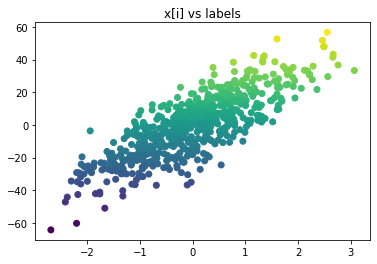

In [24]:
X_reg, y_reg = make_regression(n_samples=600, n_features=2)

plt.title("x[i] vs labels", fontsize='large')
#plt.scatter(X_reg[:, 0], y_reg,  c=y_reg)
plt.scatter(X_reg[:, 1], y_reg, c=y_reg);

**(0.5 балла)** Выпишите как выглядит точное решение задачи линейной регрессии. Решите задачу регрессии с помощью этого подхода без использования и с использованием регуляризации. Есть ли недостатки у такого подхода к решению задачи?

## Linear Regression from Scratch:

In [30]:
"""
    Without regularization
    
        ==> недостатки only works if space is linear seperable
"""


def cost_func(y_pred, y):
    M = len(y)
    errors = y_pred - y                                     
    cost = 1/(2*M) * np.sum(np.square(errors))
    return cost
    

class LinearRegression:
    def __init__(self, X, y, random_init=False):
        self.X = add_bias(X)
        self.y = y.reshape(-1,1)
        self.M = self.X.shape[0]
        self.N = self.X.shape[1]
        if random_init == False:
            self.w = xavier(self.N, 1)
        else:
            self.w = np.random.normal(0, 0.01, (self.N, 1))
            #self.w = np.zeros((self.N, 1))
  
   
    def fit(self, epochs=100, lr=0.001):
        cost_arr = []
        for i in range(epochs):
            y_pred = np.dot(self.X, self.w)
            cost = cost_func(y_pred, self.y)
            cost_arr.append(cost)
            self.w = self.w - lr * (1 / self.N) * np.dot(self.X.T, y_pred - self.y)    
        return cost_arr
    
    def predict(self, X, y):
        X = add_bias(X)
        y = y.reshape(-1,1)
        y_pred = np.dot(X, self.w)
        acc = cost_func(y_pred, y)
        return acc

### Linear Regression Accuracy:

mean squared error 2.477572814964137e-18


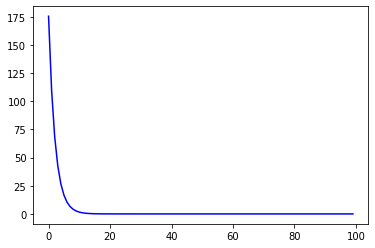

In [31]:
lin = LinearRegression(X_reg, y_reg, False)
cost = lin.fit(100)
mean_error =  lin.predict(X_reg, y_reg)
print("mean squared error", mean_error)

plt.plot(range(0, len(cost)), cost, color ='blue');

**(0.5 балла)** Примените метод стохастического градиентного спуска реализованный ранее. Сильно ли отличается полученный вектор параметров по сравнению с точным решением? 

In [34]:
class SGDLinearRegression:
    def __init__(self, X, y, random_init=False):
        self.X = add_bias(X)
        self.y = y.reshape(-1,1)
        self.M = self.X.shape[0]
        self.N = self.X.shape[1]
        if random_init == False:
            self.w = xavier(self.N, 1)
        else:
            self.w = np.random.normal(0, 0.01, (self.N, 1))
            #self.w = np.zeros((self.N, 1))
  
   
    def fit(self, epochs=100, lr=0.001, batch_size=20):
        cost_arr = []
        for i in range(epochs):
            random_indices = np.random.choice(self.M, size=batch_size, replace=False) # random sample
            y_batch = np.take(self.y, random_indices)
            y_batch = y_batch.reshape(-1,1)
            X_batch = self.X [random_indices, :]
            
            
            y_pred = np.dot(X_batch, self.w)
            cost = cost_func(y_pred, y_batch)
            cost_arr.append(cost)
            self.w = self.w - lr * (1 / self.N) * np.dot(X_batch.T, y_pred - y_batch)    
        return cost_arr
    
    def predict(self, X, y):
        X = add_bias(X)
        y = y.reshape(-1,1)
        y_pred = np.dot(X, self.w)
        acc = cost_func(y_pred, y)
        return acc

mean squared error 42.313327847642086


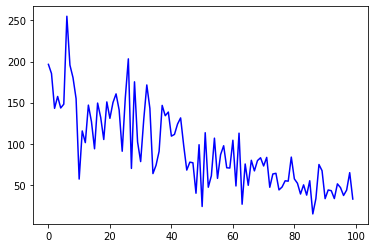

In [35]:
sgd_lr = SGDLinearRegression(X_reg, y_reg, False)
cost = sgd_lr.fit(100)
mean_error =  sgd_lr.predict(X_reg, y_reg)
print("mean squared error", mean_error)

plt.plot(range(0, len(cost)), cost, color ='blue');

### Differnce betwen SGD weight and GD weights

In [36]:
"""
    What is  точным решением???
        =>  mean square error is the same, is that a coincidence?
"""

print(lin.w, "GD weights \n")
print(sgd_lr.w, "SGD weights \n")

diff_v = lin.w - sgd_lr.w
print("eucledian distance:", np.linalg.norm(diff_v))

[[-6.16224276e-10]
 [ 1.07593090e+01]
 [ 1.50712611e+01]] GD weights 

[[-0.20636785]
 [ 5.69473355]
 [ 7.67313739]] SGD weights 

eucledian distance: 8.967984513368418


К сожалению, линейная регрессия позволяет хорошо восстанавливать *линейные* зависимости, однако в общем случае хуже работает с более сложными данными. Это хорошо можно увидеть на следующем примере.

Пусть исходная зависимость имеет вид $y = x \cdot sin(x)$. Сгенерируем соответствующие точки:

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X = np.linspace(0, 10, 100)
y = X * np.sin(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

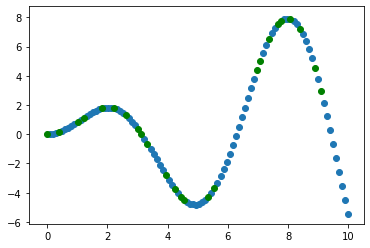

In [128]:
_ = plt.scatter(X_train, y_train)
_ = plt.scatter(X_test, y_test, c='g')

Если теперь к полученным данным применить модель линейной регрессии, то получим следующее решение:

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
lr = LinearRegression()
lr.fit(X_train[:, np.newaxis], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

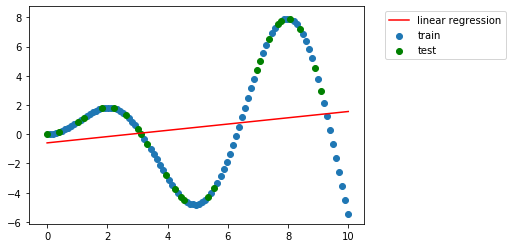

In [131]:
_ = plt.scatter(X_train, y_train)
_ = plt.scatter(X_test, y_test, c='g')
y_plot = lr.predict(X[:, np.newaxis])
_ = plt.plot(X, y_plot, c='r')
_ = plt.legend(('linear regression', 'train', 'test'), bbox_to_anchor=(1.05, 1), loc=2)

Качество модели регрессии можно оценивать с помощью некоторых метрик, например $MSE = \sum_{i=1}^l(a(x_i) - y_i)^2$ и в данном случае оно равно:

In [132]:
from sklearn.metrics import mean_squared_error

In [133]:
mean_squared_error(y_test, lr.predict(X_test[:, np.newaxis])) 

14.759977502823233

Построенное решение совсем отдаленно напоминает исходную зависимость. Одним из способов улучшить результат является добавление всех попарных произведений признаков, а также степеней: $x_1, \dots, x_d, x_1^2, x_1x_2, \dots, x_d^2, \dots$

### Задание

**(0.5 балла)** Воспользуйтесь классом [PolynomialFeatures](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures) и добавьте к данным зависимости $y = x \cdot sin(x)$ различные полиномы.

 - рассмотрите как степень полинома (от 1 до 20) влияет на качество
 - изобразите на графике предсказание аналогично линейной регрессии
 - сравните этот подход с функцией [polyfit](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.polyfit.html)

В чем могут быть недостатки такого подхода?

Taylor Series

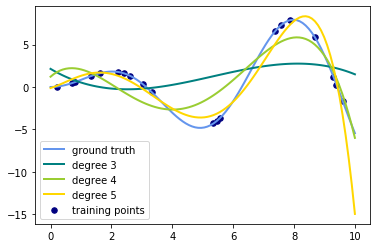

In [235]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]


colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

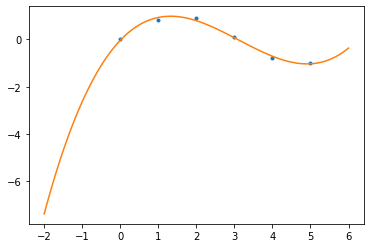

In [146]:
xs = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
ys = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(xs, ys, 3)
p = np.poly1d(z)
xp= np.linspace(-2, 6, 100)

#_ = plt.scatter(xs, ys, interval, p(interval))
_ = plt.plot(xs, ys, '.', xp, p(xp), '-')

## Линейный SVM

Вернемся к задаче бинарной классификации. Будем обозначать обучающую выборку $\{(x_n, y_n)\}_{n=1}^N$, где $N$ — количество объектов, $\boldsymbol x_n \in \mathbb{R}^d$ — числовой вектор признакового описания объекта, $y_n \in \{+1, -1\}$ — класс объекта.

SVM обучает модель разделяющей гиперплоскости:
$$f(\boldsymbol x) = \boldsymbol w^T \boldsymbol x + b$$
Параметры модели — вектор весов $\boldsymbol w \in \mathbb{R}^d$ и сдвиг $b \in \mathbb{R}$.

Обучение модели происходит путем решения оптимизационной задачи:
$$
\begin{gather}
    \frac{1}{2} \| \boldsymbol w \|^2 + C \sum_{n=1}^N \xi_n \to \min_{\boldsymbol w, \boldsymbol \xi, b} \\
    \text{s.t.: } \quad y_n (\boldsymbol w^T \boldsymbol x_n + b) \geq 1 - \xi_n, \quad \xi_n \geq 0, \quad \forall n=1,\dots,N
\end{gather}
$$

Ограничения вида $y_n (\boldsymbol w^T \boldsymbol x_n + b) \geq 1$ требуют, чтобы объекты правильно классифицировались разделяющей гиперплоскостью. Поскольку линейная разделимость выборки не гарантируется на практике, вводят переменные $\xi_n$ (slack variables), которые ослабляют ограничения правильной классификации. В оптимизируемом функционале слагаемое $\| \boldsymbol w \|^2$ штрафует малую ширину разделяющей гиперплоскости, сумма $\sum_n \xi_n$ штрафует ослабление ограничений. 

После нахождения решения оптимизационной задачи $(\boldsymbol w_{\star}, \boldsymbol \xi_{\star}, b_{\star})$, часть ограничений становятся _активными_, т.е. переходят в "крайнее положение" — точное равенство:
$$\quad y_n (\boldsymbol w_{\star}^T \boldsymbol x_n + b_{\star}) = 1 - \xi_{\star,n}$$
Объекты, соответствующие активным ограничениям, называются _опорными_.

Гиперпараметр $C$ задает баланс между шириной разделяющей полосы и ошибками, допускаемыми классификатором. Обратите внимание, что $C$ фиксируется до обучения и не оптимизируется вместе с параметрами модели. Этот гиперпараметр отвечает за обобщающую способность разделяющей гиперплоскости, высокая обобщающая способность (соответствующая большому значению $C$) может привести к переобучению, если линейная модель хорошо описывает обучающие примеры. При подборе оптимального гиперпараметра $C$ необходимо оценивать качество на отложенной выборке или кросс-валидации. Как правило, для конкретной задачи заранее неизвестно, какой порядок имеет оптимальное значение гиперпараметра $C$, поэтому перебирать значения лучше по логарифмической сетке, например: $10^{-3}, 10^{-2}, \dots, 10^{5}$.

Особенность этого метода в том, что он имеет решение, которое может быть найдено используя квадратичное программирование. В этом задании мы не будем сводить данную задачу к задаче квадратичного программирования, а воспользуемся готовой реализацией из библиотеки sklearn.

### Особенности реализации

Обратите внимание, что в библиотеке sklearn можно найти 2 реализации линейного SVM: [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) и [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) с ядровой функцией *linear*. Эти реализации имеют различие в библиотеках, на которых основаны: в первом случае используется библиотека *liblinear*, во втором — *libsvm*. Каждая из библиотек имеет свои плюсы, поэтому перед применением стоит определиться какая из реализаций подходит больше. Обратите внимание, что это различие есть только для линейного SVM.

В данном задании рекомендуем использовать класс [sklearn.svm.SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) с параметром *kernel='linear'*.

### Задание

Сгенерируйте три случайные двумерные выборки для бинарной классификации (хотя бы по 400 точек в каждой):
- с линейно-разделимыми классами
- с хорошо разделимыми классами, но не линейно
- с плохо разделимыми классами по имеющимся признакам
    
Для генерации случайной выборки можно воспользоваться функциями, которые находятся в пакете [sklearn.datasets](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets). Для того чтобы выборки не менялись при перезапуске ноутбука, фиксируйте параметр *random_state*.

**(1 балл)** Протестируйте линейный SVM  на сгенерированных выборках. Покажите на плоскости разделяющую прямую и линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Проделайте это для разных значений параметра $C$ (не менее 4-х).

**(1 балл)** Как зависит число опорных векторов от параметра $C$ для различных выборок?

#### Явное преобразование признаков

Как и в случае с линейной регрессией, когда оптимальная разделяющая гиперплоскость не является линейной, данная модель является очень грубым решением. Линейная неразделимость объектов может быть исправлена путем перехода в другое признаковое пространство, в котором линейная модель лучше описывает данные и, возможно, существует правильно классифицирующая разделяющая гиперплоскость:

$$\boldsymbol x \in \mathbb{R}^d \mapsto \phi(\boldsymbol x) \in \mathbb{R}^t$$

Так, например, аналогичное добавление всех попарных произведений признаков: $\phi(x_1, \dots, x_d) = (x_1, \dots, x_d, x_1^2, x_1x_2, \dots, x_d^2)$ переводит в пространство, в котором линейная гиперплоскость является квадратичной формой в исходном пространстве и в исходном пространстве признаков разделяющая поверхность может быть, скажем, эллипсом.

[Видеоролик с демонстрацией](https://youtu.be/9NrALgHFwTo)

### Задание

**(1 балл)** На тех же данных используя явное преобразование признаков обучите методом опорных векторов квадратичную разделяющую поверхность. Покажите на плоскости разделяющую прямую и линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Проделайте это для разных значений параметра $C$.

## Двойственный переход и Ядровой SVM

![](http://i.imgur.com/bJAzRCt.png)

Задачу обучения линейного SVM, рассмотренную в предыдущем пункте принято называть _прямой_ оптимизационной задачей для SVM. Любая задача оптимизации с ограничениями имеет [_двойственную_ задачу Лагранжа](http://goo.gl/OujTPr), в которой оптимизируются _двойственные переменные_ (множители Лагранжа), соответствующие штрафу за нарушение ограничений, максимизируется нижняя оценка функционала прямой задачи. В случае задачи квадратичного программирования, решение двойственной задачи (значение оптимизируемого функционала) совпадает с оптимумом прямой задачи.

Подробнее можно почитать в [статье](http://www.machinelearning.ru/wiki/images/2/25/SMAIS11_SVM.pdf).

Двойственная задача для SVM имеет вид:
$$
\begin{gather}
    \sum_{n} \alpha_n - \frac{1}{2}\sum_{n}\sum_{n'} \alpha_{n}\alpha_{n'} y_{n}y_{n'} x_{n}^Tx_{n'} \to \max_{\alpha} \\
    \begin{aligned}
        \text{s.t. } \quad  
        & 0 \le \alpha_n \le C, \quad \forall n = 1, \dots, N \\
        & \sum_{n} \alpha_n y_n = 0
    \end{aligned}
\end{gather}
$$

Оптимизируется вектор из двойственных переменных $\alpha_n$, соответствующих объектам обучающей выборки. Объект $x_n$ является опорным, если $\alpha_n > 0$.

Предсказание вычисляется по следующему правилу:
$$\hat{y}(x) = \text{sign}\left(\sum_{n}\alpha_{n}y_{n}x^Tx_{n} + b\right).$$

Для предсказания необходимо оценить значение $b$. Известно, что для любого опорного объекта, который классифицируется безошибочно верно:
$$y_n = \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'} + b,$$
значит для любого такого объекта:
$$b = y_n - \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'}.$$

В случае наличия ошибок классификации обучающей выборки, предлагается усреднять значение $b$ по всем опорным векторам:
$$b = \frac{1}{N_\text{SV}}\sum_{n \in \text{SV}}\left(y_n - \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'}\right).$$
Интуиция здесь такова, что суммарные ошибки в положительную сторону примерно равны суммарным ошибкам в отрицательную сторону.

Другой вариант — отказаться от параметра $b$ и работать с моделью $f(x) = w^Tx$, добавив к вектору $x$ константный признак.

#### Неявное преобразование признаков
Отметим, что двойственная задача SVM содержит вектора признаков исключительно в виде скалярного произведения $x^Tx'$. Эта особенность позволяет производить неявное преобразование признакового пространства. Вместо вычисления функции $\phi(\boldsymbol x)$, которая может отображать исходные признаки в вектора очень большой размерности, будем вычислять скалярное произведение $k(\boldsymbol x, \boldsymbol x') = \phi(\boldsymbol x)^T\phi(\boldsymbol x')$ называемое _ядром_. 


В этом задании используйте класс $sklearn.svm.SVC$, меняя тип ядра. 

### Задание

**(1.5 балла)** Протестируйте на предыдущих двумерных выборках ядровой SVM. Покажите на плоскости строящиеся разделяющие поверхности, линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Попробуйте следующие ядровые функции:
- линейная: $k(x, x') = x^Tx'$
- полиномиальная: $k(x, x') = (x^Tx' + 1)^d$ с различными степенями $d = 2,3,\dots$
- Гауссовская-RBF: $k(x, x') = \exp(-\sigma\|x - x'\|^2)$

Ответьте на следующие вопросы:
 - Как ведет себя SVM с полиномиальным ядром в зависимости от параметров $C$ и степени ядра $d$?
 - Как ведет себя SVM с RBF-ядром в зависимости от параметров $C$ и $\sigma$? Поварьируйте параметры $C$ и $\sigma$ по логарифмической сетке. Какие значения параметров ведут к переобучению, а какие — к слишком грубой модели?

## Выводы

**(1 балл)** В этой работе вы рассмотрели некоторые линейные модели машинного обучения, а также способы их обучения. Ответьте на следующие вопросы:

 - Какие есть достоинства у рассмотренных моделей? Поясните свой ответ для каждой модели.
 - Каким общим недостатком обладают данные модели? Какие есть способы его устранения? В чем может заключаться сложность использования этого подхода?
 - В чем заключаются различия с точки зрения обучения алгоритмов? Какие есть достоинства и недостатки у рассмотренных методов обучения?
 - Предположите в каком случае каждый из алгоритмов будет работать лучше: при большом/небольшом количестве данных? Поясните почему. 